In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn import datasets
from sklearn import linear_model
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

%matplotlib inline

## Random Forest

In [2]:
train=pd.read_csv('TrainClean.csv',index_col=0).reset_index(drop=True)
X = train.drop(columns='NumberOfSales')
X = X.drop(columns='NumberOfCustomers')
y = train["NumberOfSales"]

In [3]:
forest = ExtraTreesRegressor(n_estimators=50, random_state=0)
forest.fit(X, y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
          oob_score=False, random_state=0, verbose=0, warm_start=False)

Feature ranking:
1. feature 2 NearestCompetitor (0.483053)
2. feature 1 HasPromotions (0.143109)
3. feature 14 HyperMarket (0.023338)
4. feature 17 General (0.022945)
5. feature 23 Region3 (0.022717)
6. feature 41 December (0.020725)
7. feature 46 Monday (0.019353)
8. feature 4 Region_GDP (0.013840)
9. feature 16 ShoppingCenter (0.013453)
10. feature 45 Saturday (0.013237)
11. feature 13 StandardMarket (0.011580)
12. feature 8 Mean_Sea_Level_PressurehPa (0.011296)
13. feature 5 Region_PopulationK (0.011103)
14. feature 15 SuperMarket (0.010769)
15. feature 3 Region_AreaKM2 (0.010383)
16. feature 10 Mean_VisibilityKm (0.009010)
17. feature 7 Mean_Humidity (0.008696)
18. feature 6 Mean_Dew_PointC (0.008184)
19. feature 9 Mean_TemperatureC (0.007870)
20. feature 56 H (0.007816)
21. feature 11 Mean_Wind_SpeedKm_h (0.007594)
22. feature 57 WCI (0.007557)
23. feature 29 Region9 (0.007350)
24. feature 27 Region7 (0.007338)
25. feature 25 Region5 (0.006491)
26. feature 20 Region0 (0.006072)
27

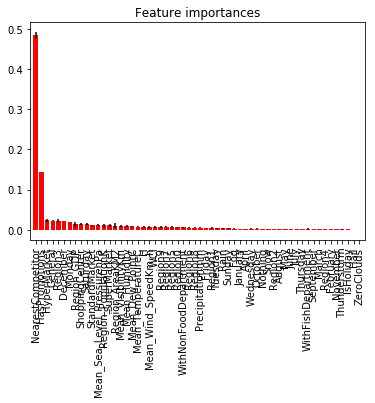

In [4]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [5]:
feature_selection_model = SelectFromModel(forest, prefit=True)

In [6]:
X_selected_features_forest = feature_selection_model.transform(X)
X_selected_features_forest.shape

(433958, 7)

In [7]:
X.columns[indices]

Index(['NearestCompetitor', 'HasPromotions', 'HyperMarket', 'General',
       'Region3', 'December', 'Monday', 'Region_GDP', 'ShoppingCenter',
       'Saturday', 'StandardMarket', 'Mean_Sea_Level_PressurehPa',
       'Region_PopulationK', 'SuperMarket', 'Region_AreaKM2',
       'Mean_VisibilityKm', 'Mean_Humidity', 'Mean_Dew_PointC',
       'Mean_TemperatureC', 'H', 'Mean_Wind_SpeedKm_h', 'WCI', 'Region9',
       'Region7', 'Region5', 'Region0', 'WithNonFoodDepartment', 'Region6',
       'Region8', 'Precipitationmm', 'Friday', 'Region1', 'Tuesday', 'Rain',
       'Sunday', 'Fog', 'January', 'April', 'Wednesday', 'October', 'Nothing',
       'Snow', 'Region2', 'August', 'May', 'June', 'July', 'Thursday',
       'WithFishDepartment', 'September', 'March', 'Region4', 'February',
       'November', 'Thunderstorm', 'IsHoliday', 'Hail', 'ZeroClouds'],
      dtype='object')